In [1]:
# import librairies
import pandas as pd
import numpy as np

electronic_sales = pd.read_excel(r"C:\Users\jki\Downloads\electronic sales\electronic sales.xlsx")
electronic_sales

,Order ID,Product,Quantity,Price,Date,Address
0,176558.0,USB-C Charging Cable,2.0,12.0,2019-04-19,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,100.0,2019-04-07,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,12.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,12.0,2019-04-30,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
65530,219872.0,Wired Headphones,1.0,12.0,2019-06-27,"846 9th St, Seattle, WA 98101"
65531,219873.0,AAA Batteries (4-pack),1.0,3.0,2019-06-18,"838 12th St, Los Angeles, CA 90001"
65532,219874.0,USB-C Charging Cable,1.0,12.0,2019-06-13,"925 Chestnut St, Atlanta, GA 30301"
65533,219875.0,Wired Headphones,1.0,12.0,2019-06-13,"692 9th St, Boston, MA 02215"


In [2]:
# lets remove mmissing values
missing_values = electronic_sales.isna().sum()
print(missing_values)

Order ID    323
Product     323
Quantity    323
Price       323
Date        323
Address     323
dtype: int64


In [8]:
# lets drop the missing values
electronic_sales.dropna(subset=['Order ID'],inplace=True)
electronic_sales.dropna(subset=['Product'],inplace=True)
electronic_sales.dropna(subset=['Quantity'],inplace=True)
electronic_sales.dropna(subset=['Price'],inplace=True)
electronic_sales.dropna(subset=['Address'],inplace=True)
# lets remove mmissing values
missing_values = electronic_sales.isna().sum()
print(missing_values)


Order ID    0
Product     0
Quantity    0
Price       0
Date        0
Address     0
dtype: int64


In [3]:
# lets have a look at the data types

electronic_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Order ID  65212 non-null  float64       
 1   Product   65212 non-null  object        
 2   Quantity  65212 non-null  float64       
 3   Price     65212 non-null  float64       
 4   Date      65212 non-null  datetime64[ns]
 5   Address   65212 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 3.0+ MB


In [25]:
# lets change the data types
electronic_sales['Price'] = pd.to_numeric(electronic_sales['Price'])
electronic_sales['Quantity'] = pd.to_numeric(electronic_sales['Quantity'])
electronic_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65212 entries, 0 to 65534
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Order ID  65212 non-null  float64       
 1   Product   65212 non-null  object        
 2   Quantity  65212 non-null  float64       
 3   Price     65212 non-null  float64       
 4   Date      65212 non-null  datetime64[ns]
 5   Address   65212 non-null  object        
 6   City      65212 non-null  object        
 7   Sales     65212 non-null  float64       
 8   Month     65212 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 5.0+ MB


In [4]:
# Augment data with additional columns

# Add month column

# Convert 'Order Date' to datetime format
electronic_sales['Date'] = pd.to_datetime(electronic_sales['Date'])

# Extract the month and create a new column 'Month'
electronic_sales['Month'] = electronic_sales['Date'].dt.month

electronic_sales.head()

,Order ID,Product,Quantity,Price,Date,Address,Month
0,176558.0,USB-C Charging Cable,2.0,12.0,2019-04-19,"917 1st St, Dallas, TX 75001",4.0
1,176559.0,Bose SoundSport Headphones,1.0,100.0,2019-04-07,"682 Chestnut St, Boston, MA 02215",4.0
2,176560.0,Google Phone,1.0,600.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0
3,176560.0,Wired Headphones,1.0,12.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0
4,176561.0,Wired Headphones,1.0,12.0,2019-04-30,"333 8th St, Los Angeles, CA 90001",4.0


In [7]:
# Add clomun city
# lets drop the missing values
electronic_sales.dropna(subset=['Order ID'],inplace=True)
electronic_sales.dropna(subset=['Product'],inplace=True)
electronic_sales.dropna(subset=['Quantity'],inplace=True)
electronic_sales.dropna(subset=['Price'],inplace=True)
electronic_sales.dropna(subset=['Date'],inplace=True)
electronic_sales.dropna(subset=['Address'],inplace=True)
electronic_sales.dropna(subset=['Month'],inplace=True)

missing_values = electronic_sales.isna().sum()
print(missing_values)


Order ID    0
Product     0
Quantity    0
Price       0
Date        0
Address     0
Month       0
dtype: int64


In [36]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

electronic_sales['City'] = electronic_sales['Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
electronic_sales.head()

,Order ID,Product,Quantity,Price,Date,Address,Month,City,Sales
1,176559.0,Bose SoundSport Headphones,1.0,100.0,2019-04-07,"682 Chestnut St, Boston, MA 02215",4.0,Boston (MA),100.0
2,176560.0,Google Phone,1.0,600.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles (CA),600.0
3,176560.0,Wired Headphones,1.0,12.0,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4.0,Los Angeles (CA),12.0
4,176561.0,Wired Headphones,1.0,12.0,2019-04-30,"333 8th St, Los Angeles, CA 90001",4.0,Los Angeles (CA),12.0
5,176562.0,USB-C Charging Cable,1.0,12.0,2019-04-29,"381 Wilson St, San Francisco, CA 94016",4.0,San Francisco (CA),12.0


In [37]:
#  Data Exploration!


# Question 1: What was the best month for sales? How much was earned that month?

electronic_sales['Sales'] = electronic_sales['Quantity'].astype('int') *electronic_sales['Price'].astype('float')


electronic_sales.groupby(['Month']).sum()

C:\Users\jki\AppData\Local\Temp\ipykernel_5444\1051771934.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  electronic_sales.groupby(['Month']).sum()


,Order ID,Quantity,Price,Sales
Month,,,,
4.0,1589063.0,9.0,2938.0,2938.0


In [22]:
# check up on the sahe

electronic_sales.shape



(65212, 9)

range(1, 13)


C:\Users\jki\AppData\Local\Temp\ipykernel_5444\2556313002.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months,electronic_sales.groupby(['Month']).sum()['Sales'])


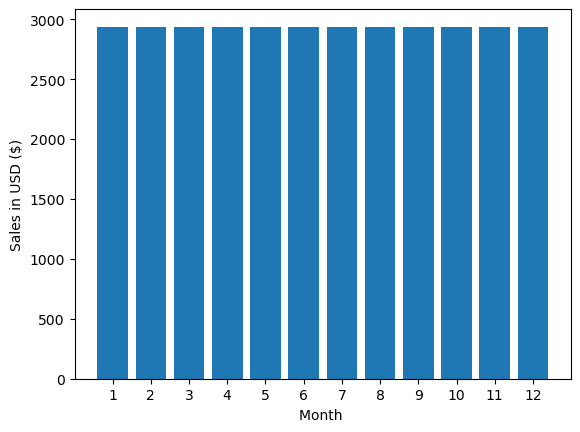

In [33]:
import matplotlib.pyplot as plt
import pandas as pd




# Create a DataFrame

months = range(1,13)
print(months)

plt.bar(months,electronic_sales.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month ')
plt.show()